In [1]:
import numpy as np
import commands

In [2]:
import sys # needed to import cat_utils
sys.path.insert(0, '/Users/abrahamn/21cmIR/21cmIRxcor/')

In [3]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
import imp
import cat_utils
imp.reload(cat_utils)

<module 'cat_utils' from '/Users/abrahamn/21cmIR/21cmIRxcor/cat_utils.pyc'>

In [5]:
# LOAD MWA CATALOG

mwa_cat = cat_utils.MWACatalog('mwa_calibration_source_list.sav')

In [6]:
# # LOAD IR CATALOGS OVER 10deg FOV centered at (RA,Dec)=(0,-27deg)

# raw_frames_path = '/Volumes/abraham/xcor_data/ATLAS_mwa57694_rereduction/'
# analysis_root = '/Volumes/abraham/xcor_data/analysis/ATLAS_mwa57694_rereduction/'
# labels = '02a57694o0326I 02a57694o0368I 02a57694o0323I 02a57694o0365I'.split()
# ir_cats_dph = [cat_utils.IRCatalog(raw_frames_path+l+'.dph',\
#                              fits_path=analysis_root+'/'+l+'/'+l+'_5degframecentered.fits') for l in labels]
# ir_cats_se = [cat_utils.IRCatalog(se_path=analysis_root+'field'+str(i)+'/field'+str(i)+'.sex',\
#                              fits_path=analysis_root+'/field'+str(i)+'/field'+str(i)+'.fits') for i in range(4)]
# ir_cats = ir_cats_se

In [7]:
# plt.figure(figsize=(12,5))
# plt.subplot(121)
# plt.imshow(cat_utils.cat2img(ir_cats_dph[0],bound_cat=ir_cats_dph[0],dtheta=dtheta_deg,jymin=0,jymax=.01),interpolation='nearest',\
#           vmin=0,vmax=.1)

# plt.subplot(122)
# plt.imshow(cat_utils.cat2img(ir_cats_se[0],bound_cat=ir_cats_se[0],dtheta=dtheta_deg,jymin=0,jymax=.01),interpolation='nearest',\
#           vmin=.0,vmax=.1)

In [8]:
# plt.figure(figsize=(20,8))

# plt.subplot(121)
# cat_utils.plot_cat_list(plt,ir_cats,[500]*4,['b']*4,jymin_vals=[.015]*4,alpha_vals=[.1]*4,exclude_artifacts=False)
# plt.ylim([-27,-21.5])
# plt.xlim([-6,0])
# plt.title('IR sources, all')

# plt.subplot(122)
# cat_utils.plot_cat_list(plt,ir_cats,[500]*4,['b']*4,jymin_vals=[.015]*4,alpha_vals=[.1]*4,exclude_artifacts=True)
# plt.ylim([-27,-21.5])
# plt.xlim([-6,0])
# plt.title('IR sources, excluding artifacts ')

In [9]:
# plt.figure(figsize=(12,10))
# cat_utils.plot_cat_list(plt,ir_cats,[500]*4,['b']*4,jymin_vals=[.015]*4,alpha_vals=[.1]*4)
# plt.xlim([-8,8])
# plt.ylim([-34,-20])

In [10]:
# plt.figure(figsize=(16,12))
# mwa_cat_ir0 = mwa_cat.limit_to_ra_dec_min_max_of_other_cat(ir_cats[1])
# cat_utils.plot_cat_list(plt,[ir_cats[1],mwa_cat_ir0],[500,60],['b','r'],jymin_vals=[.015,0],alpha_vals=[.1,.6])
# # plt.xlim([-8,8])
# # plt.ylim([-34,-20])

In [11]:
# matplotlib.rcParams.update({'font.size': 16})

# plt.figure(figsize=(30,4))
# plt.subplot(121)
# cat_utils.logloghist(plt,ir_cats[0].jy[ir_cats[0].jy<5],.00001,.2,30,'b')
# plt.xlim([.00001,.2])
# plt.title('IR sources')
# plt.xlabel('Jy')
# plt.ylabel('#')
# plt.yscale('log', nonposy='clip')

# plt.subplot(122)
# cat_utils.logloghist(plt,mwa_cat.jy[mwa_cat.jy<500],.001,500,30,'r')
# plt.xlim([.001,500])
# #plt.xlim([0,10])
# plt.title('MWA sources')
# plt.xlabel('Jy')
# plt.ylabel('#')
# plt.yscale('log', nonposy='clip')

In [54]:
# plt.figure(figsize=(14,6))

# plt.subplot(121)
# plt.imshow(ir_img,interpolation='nearest')
# plt.colorbar()

# plt.subplot(122)
# plt.imshow(mwa_img,interpolation='nearest')
# plt.colorbar()

In [12]:
nbins = 10
lmax = 3000
dtheta_deg = 5./60 # 5arcmin
num_ir_fields = 4

In [13]:
# ir_mwa_jymin_max_vals = [
# # [0,2.e-1,0,100],
# # [0,1.e-2,0,100],
# # [0,1.e-3,0,100],
# # [0,1.e-4,0,100],
# # [0,.5e-4,0,100],
# # [0,2.e-1,0,10],
# # [0,1.e-2,0,10],
# # [0,1.e-3,0,10],
# # [0,1.e-4,0,10],
# # [0,.5e-4,0,10],
# # [0,2.e-1,0,1],
# # [0,1.e-2,0,1],
# # [0,1.e-3,0,1],
# # [0,1.e-4,0,1],
# # [0,.5e-4,0,1],
# # [0,2.e-1,0,.1],
# # [0,1.e-2,0,.1],
# # [0,1.e-3,0,.1],
# # [0,1.e-4,0,.1],
# # [0,.5e-4,0,.1],
# [0,.05,0,1]
# ]

# imp.reload(cat_utils)
# for paramseti in range(len(ir_mwa_jymin_max_vals)):
#     print(ir_mwa_jymin_max_vals[paramseti])
#     ir_jymin,ir_jymax,mwa_jymin,mwa_jymax = ir_mwa_jymin_max_vals[paramseti]

#     pspec1 = np.zeros(nbins)
#     pspec2 = np.zeros(nbins)
#     xspec = np.zeros(nbins)
#     bin_counts = np.zeros(nbins)
#     for fieldi in range(num_ir_fields):
#         ir_img = cat_utils.cat2img(ir_cats[fieldi],bound_cat=ir_cats[fieldi],dtheta=dtheta_deg,jymin=ir_jymin,jymax=ir_jymax)
#         mwa_cat_ir0 = mwa_cat.limit_to_ra_dec_min_max_of_other_cat(ir_cats[fieldi])
#         mwa_img = cat_utils.cat2img(mwa_cat_ir0,bound_cat=ir_cats[fieldi],dtheta=dtheta_deg,jymin=mwa_jymin,jymax=mwa_jymax)

#         lbins,pspec1_field,pspec2_field,xspec_field,bin_counts_field = cat_utils.calc_xspec(ir_img,mwa_img,dtheta_deg,nbins,lmax)
#         pspec1 += pspec1_field/num_ir_fields
#         pspec2 += pspec2_field/num_ir_fields
#         xspec += xspec_field/num_ir_fields
#         bin_counts += bin_counts_field
        
#     cat_utils.plot_spectra(plt,lbins,pspec1,pspec2,xspec,bin_counts,ir_mwa_jymin_max_vals[paramseti])

# what about comparing MWA sources to far IR (akari) sources?

In [6]:
# import pyfits
# hdulist = pyfits.open('/Users/abrahamn/Documents/MIT/21cm/21cmIR/ir_catalogs/AKARI-FIS_BSC_V1.fits')
# #hdulist = pyfits.open('/Users/abrahamn/Downloads/AKARI-FIS_BSC_V1.fits.txt')
# he = hdulist[1].header
# akaridat = hdulist[1].data
# ra = akaridat['ra']
# ra[ra>180] -= 360.
# dec = akaridat['dec']
# flux90 = akaridat['flux65']
# mwamask = (ra > -10)&(ra < 10)&(dec > -37)&(dec < -17)&np.logical_not(np.isnan(flux90))

In [7]:
# plt.plot(ra[mwamask],dec[mwamask],'.')

In [8]:
# akaricat = cat_utils.Catalog(ra[mwamask],dec[mwamask],flux90[mwamask])
# mwa_cat_akari = mwa_cat.limit_to_ra_dec_min_max_of_other_cat(akaricat)

In [121]:
# cat_utils.logloghist(plt,mwa_cat_akari.jy,1.e-3,1.e2,50,'r')
# plt.xlabel('Jy')
# plt.ylabel('#')
# plt.title('Patti''MWA catalog histogram (mwa_calibration_source_list)\n limited to EOR0 field')

In [122]:
# nbins = 10
# lmax = 3000
# dtheta_deg = 5./60 # 5arcmin

In [20]:
# ir_img = cat_utils.cat2img(akaricat,bound_cat=akaricat,dtheta=dtheta_deg,jymin=0,jymax=1.e9)
# mwa_img = cat_utils.cat2img(mwa_cat_akari,bound_cat=akaricat,dtheta=dtheta_deg,jymin=0,jymax=1.e9)

# lbins,pspec1,pspec2,xspec,bin_counts = cat_utils.calc_xspec(ir_img,mwa_img,dtheta_deg,nbins,lmax)

# cat_utils.plot_spectra(plt,lbins,pspec1,pspec2,xspec,bin_counts,[0,0,0,0])

## what about comparing MWA sources to mid IR (WISE) sources?

In [24]:
from astropy.table import Table

In [25]:
###t = Table.read('/Volumes/abraham/xcor_data/far_ir_catalogs/wise_allsky.allsky_4band_p3as_psd31177.tbl', format='ipac') # WISE
t = Table.read('/Users/abrahamn/Documents/MIT/21cm/21cmIR/ir_catalogs/wise_allwise.wise_allwise_p3as_psd18333.tbl', format='ipac')  # ALLWISE

In [26]:
ra = t['ra'].data.data
ra[ra>180] -= 360
dec = t['dec'].data.data
w1_mag = t['w1mpro'].data.data
w2_mag = t['w2mpro'].data.data
w3_mag = t['w3mpro'].data.data
w4_mag = t['w4mpro'].data.data

w1_jy = 309.54*10.**(-w1_mag/2.5) # these numbers are from http://wise2.ipac.caltech.edu/docs/release/allsky/expsup/sec4_4h.html#example
w2_jy = 171.787*10.**(-w2_mag/2.5)
w3_jy = 31.674*10.**(-w3_mag/2.5)
w4_jy = 8.363*10.**(-w4_mag/2.5)

# the mag uncertainty columns have a 'null' (which python reads as a 0) if the 
# mag is actually a 95% upper limit (ie, if the source is not actually detected)
w1_dmag = t['w1sigmpro'].data.data
w2_dmag = t['w2sigmpro'].data.data
w3_dmag = t['w3sigmpro'].data.data
w4_dmag = t['w4sigmpro'].data.data

g1 = (w1_dmag!=0)
g2 = (w2_dmag!=0)
g3 = (w3_dmag!=0)
g4 = (w4_dmag!=0)
gall = g1&g2&g3&g4

w12 = w1_mag-w2_mag
w23 = w2_mag-w3_mag
# w34 = w3_mag-w4_mag # Note that according to Table 1 in https://arxiv.org/abs/1405.7966, 
#                       we don't need w3-w4 to filter out stars, or to discern between the other classes.
#                       And using this classification requires a detection in W4, which drastically reduces # sources.
ccs = [w12,w23]#,w34]

src_types = ['qso','agn','sf']
cc_means = [[1.2,2.91,2.45],\
            [0.51,3.31,2.54],\
            [0.27,3.84,2.19]]

cc_hwhms = [[.16,.22,.19],\
            [.26,.33,.29],\
            [.12,.27,.33]]

issrc = np.ones((len(src_types),len(g1)),dtype=bool)
for typei in range(len(src_types)):
    issrc[typei,:] = g1&g2&g3
    for cci in range(2):
        issrc[typei,:] &= (cc_means[typei][cci]-1.*cc_hwhms[typei][cci]<ccs[cci])&\
                          (cc_means[typei][cci]+1.*cc_hwhms[typei][cci]>ccs[cci])
for typei in range(len(src_types)):
    unambiguous_classification = 1==np.sum(issrc,axis=0)
    gcurr = issrc[typei,:]&unambiguous_classification
    catcurr = cat_utils.Catalog(ra[gcurr],dec[gcurr],w3_jy[gcurr])
    pickle.dump(catcurr, open( "/Users/abrahamn/Documents/MIT/21cm/21cmIR/ir_catalogs/w3_"+\
                              src_types[typei]+".p", "wb" ) )
    
    print('found %d %s\'s, %d with unambiguous classification'%(np.sum(issrc[typei,:]),src_types[typei],np.sum(unambiguous_classification&issrc[typei,:])))

found 5132 qso's, 5132 with unambiguous classification
found 106580 agn's, 101408 with unambiguous classification
found 55782 sf's, 50610 with unambiguous classification


In [139]:
pickle.dump(cat_utils.Catalog(ra[g1&g2&g3],dec[g1&g2&g3],w2_jy[g1&g2&g3]), open( "/Users/abrahamn/Documents/MIT/21cm/21cmIR/ir_catalogs/w2_g1g2g3.p", "wb" ) )

In [313]:
# a simply quasar/agn cut
g = g1&g2&(w1_mag-w2_mag>.6)
pickle.dump(cat_utils.Catalog(ra[g],dec[g],w2_jy[g]), open( "/Users/abrahamn/Documents/MIT/21cm/21cmIR/ir_catalogs/w2_w1-w2>0.6.p", "wb" ) )

g = g1&g2&(w1_mag-w2_mag<.6)
pickle.dump(cat_utils.Catalog(ra[g],dec[g],w2_jy[g]), open( "/Users/abrahamn/Documents/MIT/21cm/21cmIR/ir_catalogs/w2_w1-w2<0.6.p", "wb" ) )

In [ ]:
pickle.dump(cat_utils.Catalog(ra[g1&g2&g3],dec[g1&g2&g3],w2_jy[g1&g2&g3]), open( "/Users/abrahamn/Documents/MIT/21cm/21cmIR/ir_catalogs/w2_g1g2g3.p", "wb" ) )

In [297]:
[(i,np.sum(i==np.sum(issrc,axis=0))) for i in [0,1,2,3]]

[(0, 4490353), (1, 157150), (2, 5172), (3, 0)]

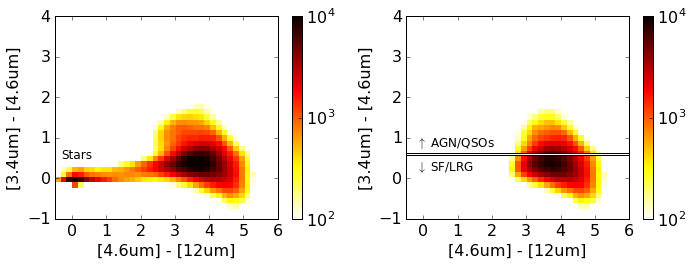

In [27]:
matplotlib.rcParams.update({'font.size': 16})
g = g1&g2&g3

gg = (w2_jy<np.percentile(w2_jy,90))&g
a = 20

b = [np.linspace(-.5,6,40),np.linspace(-1,4,40)]

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.hist2d(w2_mag[g]-w3_mag[g], w1_mag[g]-w2_mag[g], bins=b,\
           norm=matplotlib.colors.LogNorm(),cmap='hot_r',vmin=100,vmax=1.e4)
plt.xlim([-.5,6])
plt.ylim([-1,4])
plt.ylim([-1,4])
plt.colorbar()

d23 = 6*.05
d12 = 6*.04
# see https://arxiv.org/abs/1405.7966, Table 1
#plt.plot([.05-d23,.05+d23,.05+d23,.05-d23,.05-d23],[-.04-d12,-.04-d12,-.04+d12,-.04+d12,-.04-d12],'k-',linewidth=3)
#plt.plot([.05-d23,.05+d23,.05+d23,.05-d23,.05-d23],[-.04-d12,-.04-d12,-.04+d12,-.04+d12,-.04-d12],'w-',linewidth=1)

plt.xlabel('[4.6um] - [12um]')
plt.ylabel('[3.4um] - [4.6um]',rotation=90)
plt.text(-.3,.5,'Stars',fontsize=12)

plt.subplot(122)
plt.hist2d(w2_mag[gg]-w3_mag[gg], w1_mag[gg]-w2_mag[gg], bins=b,\
           norm=matplotlib.colors.LogNorm(),cmap='hot_r',vmin=100,vmax=1.e4)

# see https://arxiv.org/abs/1405.7966, Table 1, also https://arxiv.org/abs/1604.04229 Fig. 2
plt.plot([-.5,6],[.6,.6],'k-',linewidth=3)
plt.plot([-.5,6],[.6,.6],'w-',linewidth=1)
plt.text(-.2,.8,'$\uparrow$ AGN/QSOs',fontsize=12,horizontalalignment='left')
plt.text(-.2,.2,'$\downarrow$ SF/LRG',fontsize=12,horizontalalignment='left')

plt.colorbar()
plt.xlim([-.5,6])
plt.ylim([-1,4])
plt.xlabel('[4.6um] - [12um]')
plt.ylabel('[3.4um] - [4.6um]',rotation=90)

plt.tight_layout()
plt.savefig("wise_color_color_figure.pdf",bbox_inches='tight')

In [163]:
[np.sum(g) for g in [g1,g2,g3,g4]]

[4643144, 3589031, 636994, 185787]

(array([  1.00000000e+00,   1.00000000e+00,   2.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   8.00000000e+00,
          1.90000000e+01,   8.00000000e+01,   2.27000000e+02,
          8.06000000e+02,   1.24500000e+03,   4.50000000e+02,
          3.15000000e+02,   2.44000000e+02,   1.92000000e+02,
          1.76000000e+02,   2.07000000e+02,   3.04000000e+02,
          5.54000000e+02,   1.04400000e+03,   1.95600000e+03,
          2.98000000e+03,   3.92500000e+03,   4.81100000e+03,
          5.46400000e+03,   6.24200000e+03,   6.41700000e+03,
          6.54800000e+03,   6.56600000e+03,   6.67400000e+03,
          6.90300000e+03,   6.74600000e+03,   5.52300000e+03,
          3.13600000e+03,   1.43600000e+03,   5.21000000e+02,
          1.34000000e+02,   5.10000000e+01,   2.20000000e+01,
          1.30000000e+01,   3.00000000e+00,   9.00000000e+00,
          1.00000000e+00,   2.00000000e+00,   2.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
        

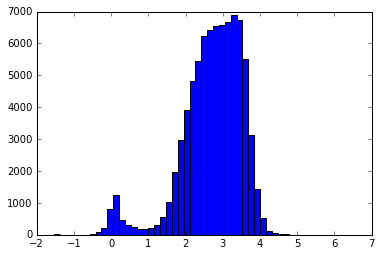

In [166]:
plt.hist(w3_mag[g3&g4]-w4_mag[g3&g4],50)

In [16]:
# plt.figure(figsize=(30,20))
# plt.scatter(w2_mag[gall]-w3_mag[gall],w1_mag[gall]-w2_mag[gall],3,w1_mag[gall],alpha=1,edgecolor='none')
# plt.colorbar()
# plt.xlim([-1,6])
# plt.ylim([-1,2])
# plt.xlabel('w2-w3 (mag)')
# plt.ylabel('w1-w2 (mag)')
# plt.title('WISE color-color diagram (colorbar is w1 mag), cf. Fig. 12 in Wright+ 10')

In [6]:
# wisecats = [cat_utils.Catalog(ra[g1],dec[g1],w1_jy[g1]),\
#            cat_utils.Catalog(ra[g2],dec[g2],w2_jy[g2]),\
#            cat_utils.Catalog(ra[g3],dec[g3],w3_jy[g3]),\
#            cat_utils.Catalog(ra[g4],dec[g4],w4_jy[g4])]

import cPickle as pickle
#pickle.dump(wisecats, open( "/volumes/abraham/xcor_data/far_ir_catalogs/wisecats.p", "wb" ) )
wisecats = pickle.load(open( "/Users/abrahamn/Documents/MIT/21cm/21cmIR/ir_catalogs/wisecats.p",'rb'))

mwa_cat_wise = mwa_cat.bound_with_cat(wisecats[0])

In [7]:
nbins = 10
lmax = 3000
dtheta_deg = 5./60 # 5arcmin

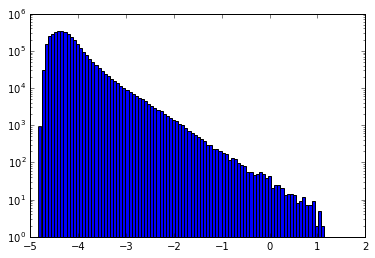

In [8]:
a=plt.hist(np.log10(wisecats[1].jy),100)
plt.gca().set_yscale('log')

In [9]:
# make flux limited wise images, and save to disk

#jy_percentile_cuts = [[0,10],[10,20],[20,30],[30,40],[40,50],[50,60],[60,70],[70,80],[80,90],[90,100]]
logjycuts = [-5,-4,-3,-2,-1,0,1]
print(logjycuts)


for j in range(len(logjycuts)-1):
    logjymin,logjymax = logjycuts[j],logjycuts[j+1]
    print('bandi = %d, logjymin,logjymax = (%d,%d)'%(1,logjymin,logjymax))
    ir_img,counts_img = cat_utils.cat2img(wisecats[1],bound_cat=wisecats[0],dtheta_deg=dtheta_deg,\
                               jymin=10.**logjymin, jymax=10.**logjymax,verbose=False)
    pickle.dump([ir_img,counts_img],open('/Users/abrahamn/Documents/MIT/21cm/21cmIR/ir_catalogs/w2_logjymin=%d_logjymax=%d.p'%(logjymin,logjymax),'wb'))

[-5, -4, -3, -2, -1, 0, 1]
bandi = 1, logjymin,logjymax = (-5,-4)
bandi = 1, logjymin,logjymax = (-4,-3)
bandi = 1, logjymin,logjymax = (-3,-2)
bandi = 1, logjymin,logjymax = (-2,-1)
bandi = 1, logjymin,logjymax = (-1,0)
bandi = 1, logjymin,logjymax = (0,1)


In [24]:
np.log10(np.percentile(wisecats[1].jy,90))

-3.742609704543681

In [21]:
# #mwa_percentile_limits = [15,90,100]
# mwa_percentile_limits = [90]
# cols = ['b']
# [np.sum(mwa_cat_wise.jy<np.percentile(mwa_cat_wise.jy,mwa_percentile_limits[l])) for l in range(len(mwa_percentile_limits))]

In [22]:
# # load flux limited wise images, plot power spectra

# def make_fname(bandi,jypercentilecut):
#     return '/volumes/abraham/xcor_data/far_ir_catalogs/w'+str(bandi+1)+'_jypercentilecut='+str(jypercentilecut[0])+'_'+str(jypercentilecut[1])+'.npz'

# nbins = 10

# #plt.figure(1,figsize=(16,12))
# plt.figure(2,figsize=(16,12))
# matplotlib.rcParams.update({'font.size': 12})

# jy_percentile_cuts_combos = [[[0,10]],\
#                              [[0,10],[10,90]],
#                             [[0,10],[10,90],[90,100]]]


# for mwa_percentile_limiti in range(len(mwa_percentile_limits)):
    
#     mwa_img = cat_utils.cat2img(mwa_cat_wise,bound_cat=wisecats[0],dtheta=dtheta_deg,jymin=0,\
#                                 jymax=np.percentile(mwa_cat_wise.jy,mwa_percentile_limits[mwa_percentile_limiti]))
    
#     for bandi in range(4):
#         for j in range(len(jy_percentile_cuts_combos)):
            
#             ir_img = np.sum(np.array([np.load(make_fname(bandi,jypercentilecut))['arr_0'] for jypercentilecut in jy_percentile_cuts_combos[j]]),axis=0)
            
# #             plt.figure(1)
# #             plt.subplot(4,len(jy_percentile_cuts_combos),len(jy_percentile_cuts_combos)*bandi+j+1)
# #             plt.imshow(ir_img)
            
#             lbins,pspec1,pspec2,xspec,bin_counts = cat_utils.calc_xspec(ir_img,mwa_img,dtheta_deg,nbins,lmax,hann=True)
#             c = xspec/np.sqrt(pspec1*pspec2)

#             plt.figure(2)
#             plt.subplot(4,len(jy_percentile_cuts_combos),len(jy_percentile_cuts_combos)*bandi+j+1)
#             #plt.plot(lbins,c,cols[mwa_percentile_limiti]+'.-',label='MWA, < %d %%, %d sources'%(mwa_percentile_limits[mwa_percentile_limiti],\
#             #                                                  np.sum(mwa_cat_wise.jy<np.percentile(mwa_cat_wise.jy,mwa_percentile_limits[mwa_percentile_limiti]))))
            
#             l = 'MWA, < %d %%, %d sources'%(mwa_percentile_limits[mwa_percentile_limiti],\
#                                                               np.sum(mwa_cat_wise.jy<np.percentile(mwa_cat_wise.jy,mwa_percentile_limits[mwa_percentile_limiti])))
#             plt.errorbar(lbins,c,np.sqrt(.5*(1+c**2)/bin_counts),color=cols[mwa_percentile_limiti],label=l)
            
#             plt.xlim([0,np.max(lbins)])
#             plt.ylim([-.1,.4])
#             if bandi == 3: plt.xlabel('\ell')
#             if j == 0: plt.ylabel('correlation')
#             plt.title('W%d, < %s'%(bandi+1,str(jy_percentile_cuts_combos[j])))
#             plt.plot([0,5000],[0,0],'k-')
            
#             if bandi==0 and j==0 and mwa_percentile_limiti==2:
#                 plt.legend(fontsize=10)

# plt.tight_layout()
# plt.savefig('MWA_ALLWISE_xcor_array_allMWAsources.png',bbox_inches='tight')

In [23]:
# # load flux limited wise images, plot power spectra

# def make_fname(bandi,jypercentilecut):
#     return '/volumes/abraham/xcor_data/far_ir_catalogs/w'+str(bandi+1)+'_jypercentilecut='+str(jypercentilecut[0])+'_'+str(jypercentilecut[1])+'.npz'

# nbins = 10

# #plt.figure(1,figsize=(16,12))
# plt.figure(2,figsize=(16,12))
# matplotlib.rcParams.update({'font.size': 12})

# jy_percentile_cuts_combos = [[[0,10]],\
#                              [[0,10],[10,90]],
#                             [[0,10],[10,90],[90,100]]]

# for mwa_percentile_limiti in range(len(mwa_percentile_limits)):
    
#     mwa_img = cat_utils.cat2img(mwa_cat_wise,bound_cat=wisecats[0],dtheta=dtheta_deg,jymin=0,\
#                                 jymax=np.percentile(mwa_cat_wise.jy,mwa_percentile_limits[mwa_percentile_limiti]))
    
#     for bandi in range(4):
#         for j in range(len(jy_percentile_cuts_combos)):
            
#             ir_img = np.sum(np.array([np.load(make_fname(bandi,jypercentilecut))['arr_0'] for jypercentilecut in jy_percentile_cuts_combos[j]]),axis=0)
            
# #             plt.figure(1)
# #             plt.subplot(4,len(jy_percentile_cuts_combos),len(jy_percentile_cuts_combos)*bandi+j+1)
# #             plt.imshow(ir_img)
            
#             lbins,pspec1,pspec2,xspec,bin_counts = cat_utils.calc_xspec(ir_img,np.flipud(mwa_img),dtheta_deg,nbins,lmax,hann=True)
#             c = xspec/np.sqrt(pspec1*pspec2)

#             plt.figure(2)
#             plt.subplot(4,len(jy_percentile_cuts_combos),len(jy_percentile_cuts_combos)*bandi+j+1)
#             #plt.plot(lbins,c,cols[mwa_percentile_limiti]+'.-',label='MWA, < %d %%, %d sources'%(mwa_percentile_limits[mwa_percentile_limiti],\
#             #                                                  np.sum(mwa_cat_wise.jy<np.percentile(mwa_cat_wise.jy,mwa_percentile_limits[mwa_percentile_limiti]))))
            
#             l = 'MWA, < %d %%, %d sources'%(mwa_percentile_limits[mwa_percentile_limiti],\
#                                                               np.sum(mwa_cat_wise.jy<np.percentile(mwa_cat_wise.jy,mwa_percentile_limits[mwa_percentile_limiti])))
#             plt.errorbar(lbins,c,np.sqrt(.5*(1+c**2)/bin_counts),color=cols[mwa_percentile_limiti],label=l)
            
#             plt.xlim([0,np.max(lbins)])
#             plt.ylim([-.1,.4])
#             if bandi == 3: plt.xlabel('\ell')
#             if j == 0: plt.ylabel('correlation')
#             plt.title('W%d, < %s'%(bandi+1,str(jy_percentile_cuts_combos[j])))
#             plt.plot([0,5000],[0,0],'k-')
            
#             if bandi==0 and j==0 and mwa_percentile_limiti==2:
#                 plt.legend(fontsize=10)

# plt.tight_layout()
# plt.savefig('MWA_ALLWISE_xcor_array_allMWAsources_flipud.png',bbox_inches='tight')

In [24]:
# # plot flux limited MWA catalog images
# plt.figure(figsize=(16,4))
# for mwa_percentile_limiti in range(len(mwa_percentile_limits)):
#     mwa_img = cat_utils.cat2img(mwa_cat_wise,bound_cat=wisecats[0],dtheta=dtheta_deg,jymin=0,\
#                                 jymax=np.percentile(mwa_cat_wise.jy,mwa_percentile_limits[mwa_percentile_limiti]))
#     print('mwa jy < %1.2f'%np.percentile(mwa_cat_wise.jy,mwa_percentile_limits[mwa_percentile_limiti]))
#     plt.subplot(1,len(mwa_percentile_limits),mwa_percentile_limiti+1)
#     plt.imshow(mwa_img,interpolation='nearest')
#     plt.colorbar()

#     plt.title('MWA, < %d %%, %d sources'%(mwa_percentile_limits[mwa_percentile_limiti],\
#                                                           np.sum(mwa_cat_wise.jy<np.percentile(mwa_cat_wise.jy,mwa_percentile_limits[mwa_percentile_limiti]))))


# WISE/SCOS galaxy redshift catalog

In [ ]:
# # http://ssa.roe.ac.uk/WISExSCOS
# wisescosraw = np.genfromtxt(\
#     '/Users/abrahamn/Documents/MIT/21cm/21cmIR/ir_catalogs/wiseScosPhotoz160708_eor0.csv',\
#     delimiter=',',skip_header=1)

In [ ]:
# ra,dec,w1_mag,w2_mag,z1,z2 = wisescosraw[:,7],wisescosraw[:,8],wisescosraw[:,12],wisescosraw[:,13],wisescosraw[:,16],wisescosraw[:,17]
# w1_jy = 309.54*10.**(-w1_mag/2.5)
# w2_jy = 171.787*10.**(-w2_mag/2.5)

In [ ]:
# plt.hist(z2)
# plt.figure()
# plt.hist(z1)

In [ ]:
# # w1scos = cat_utils.Catalog(ra,dec,w1_jy)
# # w2scos = cat_utils.Catalog(ra,dec,w2_jy)

# import cPickle as pickle
# # pickle.dump(w1scos, open( "/Users/abrahamn/Documents/MIT/21cm/21cmIR/ir_catalogs/w1scos.p", "wb" ) )
# # pickle.dump(w2scos, open( "/Users/abrahamn/Documents/MIT/21cm/21cmIR/ir_catalogs/w2scos.p", "wb" ) )

# w1scos = pickle.load(open( "/Users/abrahamn/Documents/MIT/21cm/21cmIR/ir_catalogs/w1scos.p",'rb'))
# w2scos = pickle.load(open( "/Users/abrahamn/Documents/MIT/21cm/21cmIR/ir_catalogs/w2scos.p",'rb'))

In [ ]:
# plt.plot(w1scos.ra,w1scos.dec,'ws')
# plt.xlim([-3,-2.5])
# plt.ylim([-30,-29])

## allwiseagn catalog

In [ ]:
# wiseagnrawdat = open('/Users/abrahamn/Documents/MIT/21cm/21cmIR/ir_catalogs/J_ApJS_221_12/allwiseagn_full.dat').readlines()

In [ ]:
# def line2dat(l):
#     return [float(l[20:30]),float(l[31:42]),float(l[54:59])]
# wiseagndat = np.array([line2dat(l) for l in wiseagnrawdat[6:len(wiseagnrawdat)-1]],dtype=float)

In [ ]:
# ra = wiseagndat[:,0]
# ra[ra>180] -= 360
# dec = wiseagndat[:,1]
# mag = wiseagndat[:,2]
# ineor0 = (ra> -20)&(ra<20)&(dec>-50)&(dec<-10)
# wiseagncat = cat_utils.Catalog(ra[ineor0],\
#                                dec[ineor0],\
#                                309.54*10.**(-mag[ineor0]/2.5)*1000 )
# pickle.dump(wiseagncat, open( "/Users/abrahamn/Documents/MIT/21cm/21cmIR/ir_catalogs/wiseagncat_eor0.p", "wb" ) )

In [38]:
# nbins = 10
# lmax = 3000
# dtheta_deg = 5./60 # 5arcmin

# mwa_cat_wiseagn = mwa_cat.limit_to_ra_dec_min_max_of_other_cat(wiseagncat)

In [30]:
# plt.hist(wiseagncat.jy[wiseagncat.jy<1],100)

In [31]:
# mwa_img = cat_utils.cat2img(mwa_cat_wiseagn,bound_cat=wiseagncat,dtheta=dtheta_deg,jymin=0,\
#                                 jymax=np.percentile(mwa_cat_wise.jy,90))

In [32]:
# ir_img = cat_utils.cat2img(wiseagncat,bound_cat=wiseagncat,dtheta=dtheta_deg,jymin=0,\
#                            jymax=np.percentile(wiseagncat.jy,70))

In [33]:
# plt.imshow(ir_img,interpolation='nearest')

In [34]:
# lbins,pspec1,pspec2,xspec,bin_counts = cat_utils.calc_xspec(ir_img,mwa_img,dtheta_deg,nbins,lmax,hann=True)
# c = xspec/np.sqrt(pspec1*pspec2)

# plt.plot(lbins,c,'.-')
# plt.ylim([-.4,.4])
# plt.plot([0,lmax],[0,0],'k-')

In [35]:
# cat_utils.plot_spectra(plt,lbins,pspec1,pspec2,xspec,bin_counts,[0,0,0,0])

In [10]:
# LOAD ATLAS_mwa57639 WHOLE FIELD CATALOG
#secat = pickle.load( open('/Volumes/abraham/xcor_data/analysis/ATLAS_mwa57639/whole_field/whole_field_secat.p', "rb" ) )
secat = pickle.load( open('/Users/abrahamn/Documents/MIT/21cm/21cmIR/ir_catalogs/whole_field_secat.p', "rb" ) )
g = secat.jy>1.e-10
secat = cat_utils.Catalog(secat.ra[g],secat.dec[g],secat.jy[g])

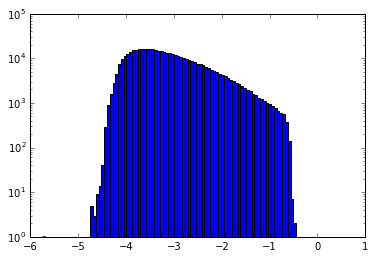

In [11]:
a=plt.hist(np.log10(np.abs(secat.jy)),100)
plt.gca().set_yscale('log')

/Users/abrahamn/anaconda2/lib/python2.7/site-packages/matplotlib/collections.py:806: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


(-15, -45)

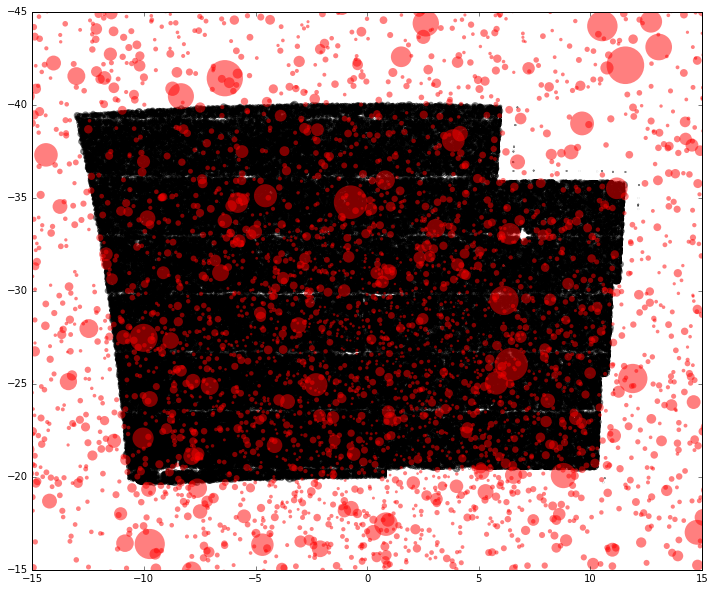

In [30]:
plt.figure(figsize=(12,10))
plt.scatter(secat.ra,secat.dec,150*secat.jy,alpha=.5,facecolors='none',edgecolors='k',linewidth=2)
plt.scatter(mwa_cat.ra,mwa_cat.dec,50*mwa_cat.jy,'r',alpha=.5,edgecolor='none')
plt.xlim([-15,15])
plt.ylim([-15,-45])

In [12]:
ir_jymin,ir_jymax = np.percentile(secat.jy,10),np.percentile(secat.jy,90)
racent,deccent = 0.,-28.
fov = 15.
dra,ddec = fov/np.cos(-27*np.pi/180.),fov
secat_fov = secat.limit_to_ra_dec_min_max(racent-dra/2,racent+dra/2,deccent-ddec/2,deccent+ddec/2)

#ir_img,counts_img = cat_utils.cat2img(secat,bound_cat=secat_fov,dtheta_deg=5./60,jymin=ir_jymin,jymax=ir_jymax,verbose=True)

In [ ]:
plt.imshow(ir_img,interpolation='nearest')

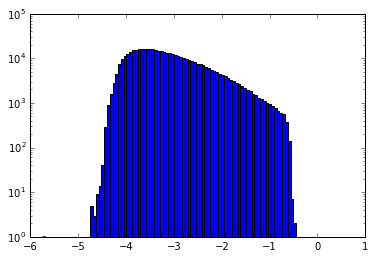

In [13]:
a=plt.hist(np.log10(secat.jy),100)
plt.gca().set_yscale('log')

In [14]:
# make flux limited secat images, and save to disk

#jy_percentile_cuts = [[0,10],[10,20],[20,30],[30,40],[40,50],[50,60],[60,70],[70,80],[80,90],[90,100]]
logjycuts = [-5,-4,-3,-2,-1,0]
print(logjycuts)

for j in range(len(logjycuts)-1):
    logjymin,logjymax = logjycuts[j],logjycuts[j+1]
    print('logjymin,logjymax = (%d,%d)'%(logjymin,logjymax))
    ir_img,counts_img = cat_utils.cat2img(secat,bound_cat=secat_fov,dtheta_deg=dtheta_deg,\
                               jymin=10.**logjymin, jymax=10.**logjymax,verbose=False)
    pickle.dump([ir_img,counts_img],open('/Users/abrahamn/Documents/MIT/21cm/21cmIR/ir_catalogs/secat_logjymin=%d_logjymax=%d.p'%(logjymin,logjymax),'wb'))

[-5, -4, -3, -2, -1, 0]
logjymin,logjymax = (-5,-4)
logjymin,logjymax = (-4,-3)
logjymin,logjymax = (-3,-2)
logjymin,logjymax = (-2,-1)
logjymin,logjymax = (-1,0)


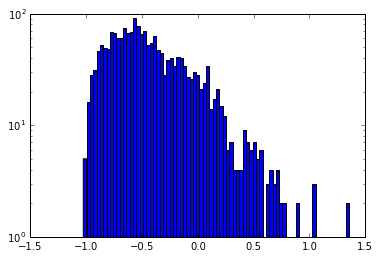

In [15]:
a=plt.hist(np.log10(mwa_cat_wise.jy),80)
plt.gca().set_yscale('log')

In [26]:
# make flux limited mwa images limited to both WISE and SECAT_FOV fields of view

# make flux limited secat images, and save to disk

#jy_percentile_cuts = [[0,10],[10,20],[20,30],[30,40],[40,50],[50,60],[60,70],[70,80],[80,90],[90,100]]
logjycuts = [-1,-.5,0,.5,1]
print(logjycuts)

for j in range(len(logjycuts)-1):
    logjymin,logjymax = logjycuts[j],logjycuts[j+1]
    print('logjymin,logjymax = (%1.1f,%1.1f)'%(logjymin,logjymax))
    mwa_img,counts_img = cat_utils.cat2img(mwa_cat,bound_cat=secat_fov,dtheta_deg=dtheta_deg,\
                               jymin=10.**logjymin, jymax=10.**logjymax,verbose=False)
    pickle.dump([mwa_img,counts_img],open('/Users/abrahamn/Documents/MIT/21cm/21cmIR/ir_catalogs/mwacat_bounded_by_secatfov_logjymin=%1.1f_logjymax=%1.1f.p'%(logjymin,logjymax),'wb'))
    
for j in range(len(logjycuts)-1):
    logjymin,logjymax = logjycuts[j],logjycuts[j+1]
    print('logjymin,logjymax = (%1.1f,%1.1f)'%(logjymin,logjymax))
    mwa_img,counts_img = cat_utils.cat2img(mwa_cat,bound_cat=wisecats[0],dtheta_deg=dtheta_deg,\
                               jymin=10.**logjymin, jymax=10.**logjymax,verbose=False)
    pickle.dump([mwa_img,counts_img],open('/Users/abrahamn/Documents/MIT/21cm/21cmIR/ir_catalogs/mwacat_bounded_by_wise_logjymin=%1.1f_logjymax=%1.1f.p'%(logjymin,logjymax),'wb'))

[-1, -0.5, 0, 0.5, 1]
logjymin,logjymax = (-1.0,-0.5)
logjymin,logjymax = (-0.5,0.0)
logjymin,logjymax = (0.0,0.5)
logjymin,logjymax = (0.5,1.0)
logjymin,logjymax = (-1.0,-0.5)
logjymin,logjymax = (-0.5,0.0)
logjymin,logjymax = (0.0,0.5)
logjymin,logjymax = (0.5,1.0)


In [18]:
# # make flux limited wise images, and save to disk

# jy_percentile_cuts = [[0,10],[10,90],[90,100]]
# for j in range(len(jy_percentile_cuts)):
#     print('jypercentilecut = (%d,%d)'%(jy_percentile_cuts[j][0],jy_percentile_cuts[j][1]))
#     ir_img = cat_utils.cat2img(secat_fov,bound_cat=secat_fov,dtheta=dtheta_deg,\
#                                jymin=np.percentile(secat_fov.jy,jy_percentile_cuts[j][0]),\
#                                jymax=np.percentile(secat_fov.jy,jy_percentile_cuts[j][1]),verbose=True)
#     np.savez('/volumes/abraham/xcor_data/far_ir_catalogs/ATLAS_mwa57639_whole_field'+\
#              '_jypercentilecut='+str(jy_percentile_cuts[j][0])+'_'+str(jy_percentile_cuts[j][1])+'.npz',ir_img)

In [20]:
# # try patti's cat
# from astropy.io import fits
# hdulist = fits.open('/Users/abrahamn/Documents/MIT/21cm/21cmIR/ir_catalogs/carroll16/KGS.fits')
# g = hdulist[1].data['R_class'] <= 6
# carroll16cat = cat_utils.Catalog(hdulist[1].data['RAJ2000'][g],\
#                                  hdulist[1].data['DECJ2000'][g],\
#                                  hdulist[1].data['S_182'][g],\
#                                  hdulist[1].data['e_RAJ2000'][g],\
#                                  hdulist[1].data['e_DECJ2000'][g])

In [19]:
# # what if we replace all the radio and IR fluxes by 1 ?

# dtheta_deg = 5./60
# m = mwa_cat_wise
# m = cat_utils.Catalog(carroll16cat.ra,carroll16cat.dec,np.ones(len(carroll16cat.ra)))
# mwaimg = cat_utils.cat2img(m,bound_cat=wisecats[0],dtheta=dtheta_deg,jymin=0,jymax=np.percentile(carroll16cat.jy,90))
# #mwaimg = cat_utils.cat2img(carroll16cat,bound_cat=mwa_cat_wise,dtheta=dtheta_deg,jymin=0,jymax=np.percentile(mwa_cat_akari.jy,90))
# #wiseimg = np.load('/Users/abrahamn/Documents/MIT/21cm/21cmIR/ir_catalogs/w4_jypercentilecut=10_90.npz')['arr_0']
# w = w1scos.limit_to_ra_dec_min_max_of_other_cat(wisecats[0])
# w = cat_utils.Catalog(w.ra,w.dec,np.ones(len(w.ra)))
# wiseimg = cat_utils.cat2img(w,bound_cat=wisecats[0],dtheta=dtheta_deg,jymin=0,jymax=1000,verbose=True)

# #redshiftcut = (0<z1)&(z1<.4)
# #wisescos = cat_utils.Catalog(w1scos.ra[redshiftcut],w1scos.dec[redshiftcut],w1scos.jy[redshiftcut])
# #wiseimg = cat_utils.cat2img(wisescos.limit_to_ra_dec_min_max_of_other_cat(wisecats[0]),bound_cat=wisecats[0],dtheta=dtheta_deg,jymin=0,jymax=np.percentile(wisescos.jy,99),verbose=True)
# mwaimg-=mwaimg.mean()
# wiseimg-=wiseimg.mean()

# xcor = np.mean(mwaimg*wiseimg)/np.sqrt(np.mean(mwaimg**2)*np.mean(wiseimg**2))
# xcor_flip = np.mean(mwaimg*np.flipud(np.fliplr(wiseimg)))/np.sqrt(np.mean(mwaimg**2)*np.mean(wiseimg**2))
# xcor,xcor_flip

In [21]:
# try with the wise cat without filtering out galaxies, note, below is the wisescos galaxy survey with photoz's

In [22]:
# plt.imshow(wiseimg,interpolation='nearest')

In [23]:
# # calculate the xcor at different resolutions
# dtheta_amin = .5

# w = w1scos.limit_to_ra_dec_min_max_of_other_cat(wisecats[0])
# mwaimg = cat_utils.cat2img(carroll16cat,bound_cat=wisecats[0],dtheta=dtheta_amin/60.,jymin=0,jymax=np.percentile(carroll16cat.jy,95),verbose=True)
# wiseimg = cat_utils.cat2img(w,bound_cat=wisecats[0],dtheta=dtheta_amin/60.,jymin=0,jymax=np.percentile(w.jy,95),verbose=True)

In [24]:
# pickle.dump(mwaimg, open( "/Users/abrahamn/Documents/MIT/21cm/21cmIR/ir_catalogs/mwaimg_dtheta=30asec.p", "wb" ) )
# pickle.dump(wiseimg, open( "/Users/abrahamn/Documents/MIT/21cm/21cmIR/ir_catalogs/w1scos_dtheta=30asec.p", "wb" ) )
# # mwaimg = pickle.load(open( "/Users/abrahamn/Documents/MIT/21cm/21cmIR/ir_catalogs/mwaimg_dtheta=30asec.p",'rb'))
# # wiseimg = pickle.load(open( "/Users/abrahamn/Documents/MIT/21cm/21cmIR/ir_catalogs/w1scos_dtheta=30asec.p",'rb'))

In [25]:
# # calculate cross spectrum
# nbins=30
# lmin,lmax = 10,30.e3

# lbins,pspec1,pspec2,xspec,bin_counts = cat_utils.calc_xspec(mwaimg,wiseimg,dtheta_amin/60.,nbins=nbins,lmin=lmin,lmax=lmax,hann=True,uselogbins=True)
# lbins,pspec1_f,pspec2_f,xspec_f,bin_counts = cat_utils.calc_xspec(mwaimg,np.fliplr(np.flipud(wiseimg)),dtheta_amin/60.,nbins=nbins,lmin=lmin,lmax=lmax,hann=True,uselogbins=True)

In [26]:
# c = xspec/np.sqrt(pspec1*pspec2)
# dc = np.sqrt(.5*(1+c**2)/(bin_counts/4))

# c_f = xspec_f/np.sqrt(pspec1_f*pspec2_f)
# dc_f = np.sqrt(.5*(1+c_f**2)/(bin_counts/4))

# plt.gcf()
# fig = plt.figure(figsize=(16,6))
# ax1 = fig.add_subplot(111)
# # ax1.errorbar(lbins,c,yerr=dc,fmt='b.-')
# # ax1.errorbar(lbins*1.1,c_f,yerr=dc_f,fmt='r.-')
# # ax1.plot([1,lmax],[0,0],'k-')
# # ax1.set_xscale('log')
# # plt.xlim([10,lmax])
# thetabins = 180.*60/lbins
# ax1.errorbar(thetabins,c,yerr=dc,fmt='b.-')
# ax1.errorbar(thetabins*1.1,c_f,yerr=dc_f,fmt='r.-')
# ax1.plot([.1,1000],[0,0],'k-')
# ax1.set_xscale('log')
# plt.xlim([.3,1000])
# plt.ylim([-.4,.4])
# plt.xlabel('180*60/ell (amin)')

In [182]:
# plt.figure(figsize=(32,8))
# plt.subplot(131)
# plt.imshow(wiseimg,interpolation='nearest',vmin=0,vmax=.04)
# plt.colorbar()

# plt.subplot(132)
# plt.imshow(mwaimg>0,interpolation='nearest')
# plt.colorbar()

# plt.subplot(133)
# plt.imshow(wiseimg+15*(mwaimg>0),interpolation='nearest',vmin=0,vmax=.04)
# plt.colorbar()

In [ ]:
# # what if we exclude WISE sources that are not within 1' of an MWA source?
# # for each wise source, find the distance to the nearest MWA source
# # for each mwa source, find all the wise sources within 1'
# wise_source_is_near_mwa_source = np.zeros(len(wisecats[0].ra))
# for i in range(len(mwa_cat_wise.ra)):
#     if i % 100 == 0: print i
#     wnear = (mwa_cat_wise.ra[i]+.5 > wisecats[0].ra)&(mwa_cat_wise.ra[i]-.5 < wisecats[0].ra)
#     dist_asec = np.sqrt((mwa_cat_wise.dec[i]-wisecats[0].dec[wnear])**2 + np.sin(mwa_cat_wise.dec[i]*np.pi/180)**2*(mwa_cat_wise.ra[i]-wisecats[0].ra[wnear])**2)*3600
#     wise_source_is_near_mwa_source[wnear] += dist_asec<60. # 1amin

In [ ]:
# len(wisecats[0].ra),np.sum(wise_source_is_near_mwa_source>0)

In [ ]:
# g = wise_source_is_near_mwa_source>0
# wisecat_sources_near_mwa_sources = cat_utils.Catalog(wisecats[0].ra[g],wisecats[0].dec[g],wisecats[0].jy[g])

In [ ]:
# wise_sources_near_mwa_sources_img = cat_utils.cat2img(wisecat_sources_near_mwa_sources,bound_cat=wisecats[0],dtheta=dtheta_deg,jymin=0,jymax=np.percentile(wisecats[0].jy,90),verbose=True)
# wise_sources_near_mwa_sources_img -= wise_sources_near_mwa_sources_img.mean()

In [ ]:
# np.mean(mwaimg*wise_sources_near_mwa_sources_img)/np.sqrt(np.mean(mwaimg**2)*np.mean(wise_sources_near_mwa_sources_img**2))

# make paper plots

In [63]:
# jy_percentile_cuts_combos = [[[0,10]],\
#                              [[0,10],[10,90]],
#                             [[0,10],[10,90],[90,100]]]

jy_percentile_cuts_combos = [[[0,10],[10,90]]]

cats = [secat_fov,wisecats[1],mwa_cat_akari]
#cats = [fullsexcat,wisecats[0],mwa_cat_akari]
cat_names = ['ATLAS I band sources','WISE 4.5um sources','MWA 185MHz sources']

dtheta_deg = 5./60

def make_wise_img_fname(bandi,jypercentilecut):
    return '/Users/abrahamn/Documents/MIT/21cm/21cmIR/ir_catalogs/w'+str(bandi+1)+'_jypercentilecut='+str(jypercentilecut[0])+'_'+str(jypercentilecut[1])+'.npz'
def make_secatwholefield_img_fname(jypercentilecut):
    return '/Users/abrahamn/Documents/MIT/21cm/21cmIR/ir_catalogs/ATLAS_mwa57639_whole_field_jypercentilecut='+str(jypercentilecut[0])+'_'+str(jypercentilecut[1])+'.npz'

In [43]:
mwa_cat_wise

<cat_utils.Catalog instance at 0x11665bc20>

MWA 185 MHz catalog
WISE 4.5 um catalog
ATLAS 850 nm catalog


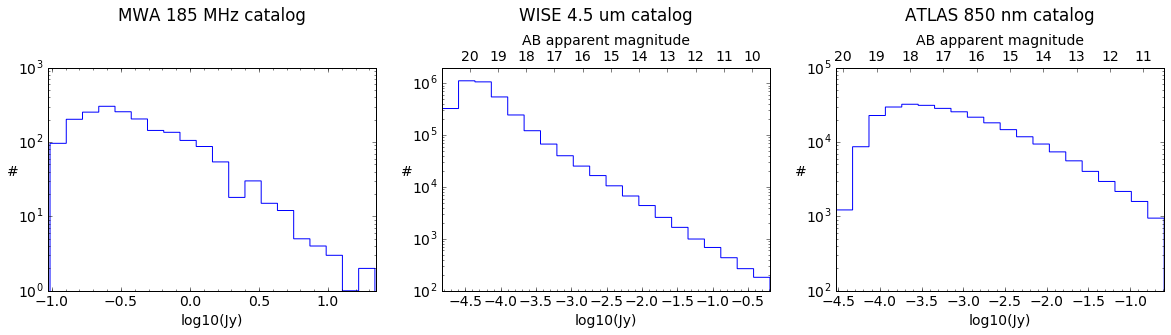

In [22]:
cats = [mwa_cat_wise,wisecats[1],secat_fov]

plt.figure(figsize=(20,4))
matplotlib.rcParams.update({'font.size': 14})

titles = ['MWA 185 MHz catalog','WISE 4.5 um catalog','ATLAS 850 nm catalog']
ylimits = [[1,1.e3],[1.e2,2.e6],[1.e2,1.e5]]
for cati in range(3):
    print(titles[cati])
    ax1 = plt.subplot(1,3,cati+1)
    jy1percentile,jy99percentile = np.percentile(cats[cati].jy,0),np.percentile(cats[cati].jy,99.99)
    plt.hist(np.log10(cats[cati].jy[(cats[cati].jy>jy1percentile)&(cats[cati].jy<jy99percentile)]),20,histtype='step')
    plt.gca().set_yscale('log')
    
#     percentiles = [10,20,30,40,50,60,70,80,90]
#     for i in range(len(percentiles)):
#         jylog = np.log10(np.percentile(cats[cati].jy,percentiles[i]))
#         print(percentiles[i],10.**jylog,-2.5*np.log10(10.**jylog/3631))
#         if i in [1,3,5,7,9]:
#             plt.text(jylog,1.25*ylimits[cati][0],str(percentiles[i])+'%', rotation=90,fontsize=10,\
#                  horizontalalignment='center',verticalalignment='bottom',fontweight='bold')
#         plt.semilogy([jylog,jylog],[1,1.e7],'k:')
    
    plt.gca().set_xticks(np.arange(-10,10)*.5)
    plt.xlim([np.log10(jy1percentile),np.log10(jy99percentile)])
    plt.ylim(ylimits[cati])
    plt.xlabel('log10(Jy)')
    plt.gca().xaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(.1))
    plt.ylabel('#',rotation=0)

    if cati>0:
        magticks = np.arange(10,25,1)
        jys_for_magticks = 3631.*10.**(-magticks/2.5)
        g = (jys_for_magticks>jy1percentile)&(jys_for_magticks<jy99percentile)
        
        ax2 = ax1.twiny()
        ax2.set_xlim(ax1.get_xlim())
        ax2.set_xticks(np.log10(jys_for_magticks[g]))
        ax2.set_xticklabels(magticks[g])
        ax2.set_xlabel("AB apparent magnitude")
    plt.title(titles[cati]+'\n\n')
    
plt.savefig('catalog_histograms.pdf',bbox_inches='tight')

(20, 21)
(20, 21)
(20, 21)


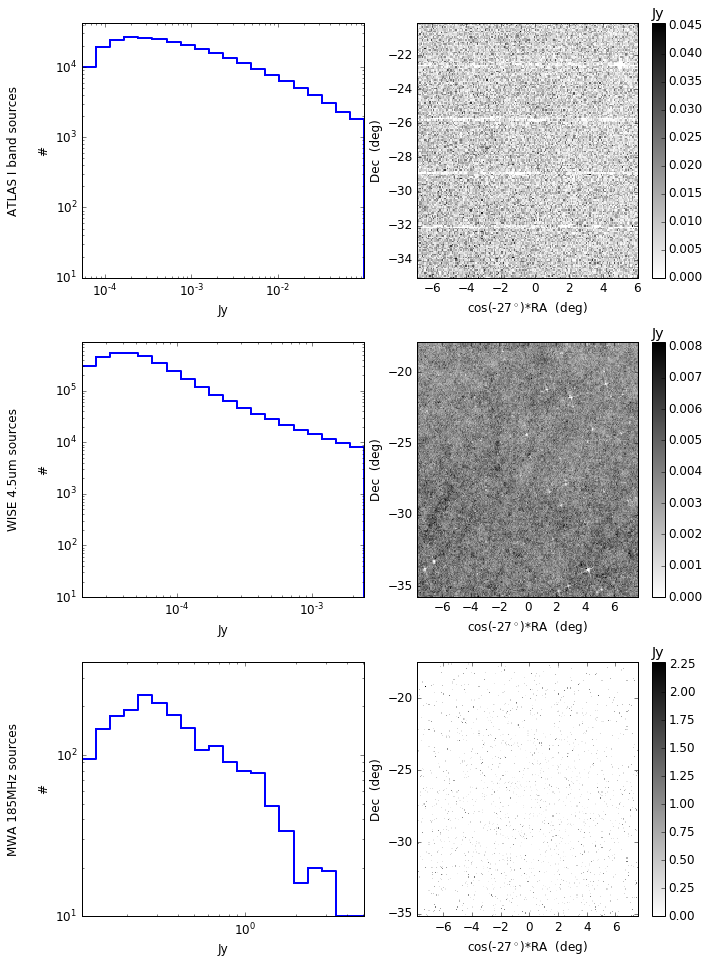

In [72]:
matplotlib.rcParams.update({'font.size': 12})

plt.figure(3,figsize=(10,13.5))

jy_percentile_cuts_comboi = 0
for cati in range(3):
    plt.subplot(3,2,2*cati+1)
    jy1percentile,jy99percentile = np.percentile(cats[cati].jy,1),np.percentile(cats[cati].jy,99)
    cat_utils.logloghist(plt,cats[cati].jy[cats[cati].jy<jy99percentile],jy1percentile,jy99percentile,20,'b')
    plt.xlabel('Jy')
    plt.ylabel(cat_names[cati]+'\n\n#')
    plt.xlim([jy1percentile,jy99percentile])
    plt.yscale('log', nonposy='clip')

    percentile_min,percentile_max = min(np.array(jy_percentile_cuts_combos[0]).flatten()), max(np.array(jy_percentile_cuts_combos[0]).flatten())

    if cati==0:
        ir_img = np.sum(np.array([np.load(make_secatwholefield_img_fname(jypercentilecut))['arr_0'] for jypercentilecut in jy_percentile_cuts_combos[jy_percentile_cuts_comboi]]),axis=0)
    elif cati==1:
        ir_img = np.sum(np.array([np.load(make_wise_img_fname(1,jypercentilecut))['arr_0'] for jypercentilecut in jy_percentile_cuts_combos[jy_percentile_cuts_comboi]]),axis=0)
    elif cati==2:
        ir_jymin,ir_jymax = np.percentile(cats[cati].jy,percentile_min),np.percentile(cats[cati].jy,percentile_max)

        ir_img = cat_utils.cat2img(cats[2],bound_cat=cats[2],dtheta=dtheta_deg,jymin=ir_jymin,jymax=ir_jymax)



    plt.subplot(3,2,2*cati+2)
    n = ir_img.shape[0]
    plt.imshow(np.swapaxes(ir_img,0,1),interpolation='nearest',cmap='gray_r',rasterized=True,extent=[(-dtheta_deg*n/2+np.mean(cats[cati].ra))*np.cos(-30*np.pi/180.),\
                                                                                                   (dtheta_deg*n/2+np.mean(cats[cati].ra))*np.cos(-30*np.pi/180.),\
                                                                                                   -dtheta_deg*n/2+np.mean(cats[cati].dec),\
                                                                                                   dtheta_deg*n/2+np.mean(cats[cati].dec)])

    plt.xlabel('cos(-27$^\circ$)*RA  (deg)')
    plt.ylabel('Dec  (deg)')
    cb = plt.colorbar()
    cb.ax.set_title('Jy')

plt.tight_layout()
#plt.savefig('catalog_hists_and_images.pdf',bbox_inches='tight')

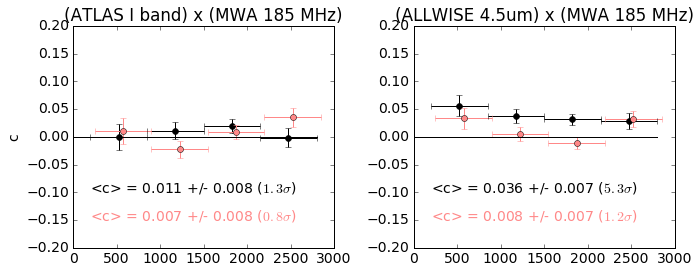

In [71]:
plt.figure(figsize=(10,4))
matplotlib.rcParams.update({'font.size': 14})

mwa_percentile_limits = [95]
cols = ['#000000','#ff8888']
nbins = 4
lmin = 200
lmax = 2800

usehann = True

for flipi in range(2):
    for mwa_percentile_limiti in range(len(mwa_percentile_limits)):
        mwa_jymin,mwa_jymax = np.percentile(mwa_cat.jy,0),np.percentile(mwa_cat.jy,mwa_percentile_limits[mwa_percentile_limiti])

        for ircati in range(2):
            for i in range(len(jy_percentile_cuts_combos)):
                percentile_min,percentile_max = min(np.array(jy_percentile_cuts_combos[i]).flatten()), max(np.array(jy_percentile_cuts_combos[i]).flatten())
#                 ir_jymin,ir_jymax = np.percentile(cats[ircati].jy,percentile_min),np.percentile(cats[ircati].jy,percentile_max)
#                 if ircati==0: # sextractor

#                     # average the cross correlation over all fields
#                     pspec1 = np.zeros(nbins)
#                     pspec2 = np.zeros(nbins)
#                     xspec = np.zeros(nbins)
#                     bin_counts = np.zeros(nbins)
#                     num_ir_fields = len(ir_cats)
#                     for fieldi in range(num_ir_fields):
#                         ir_img = cat_utils.cat2img(ir_cats[fieldi],bound_cat=ir_cats[fieldi],dtheta=dtheta_deg,jymin=ir_jymin,jymax=ir_jymax)
#                         mwa_cat_ir0 = mwa_cat.limit_to_ra_dec_min_max_of_other_cat(ir_cats[fieldi])
#                         mwa_img = cat_utils.cat2img(mwa_cat_ir0,bound_cat=ir_cats[fieldi],dtheta=dtheta_deg,jymin=mwa_jymin,jymax=mwa_jymax)

#                         mwa_img = mwa_img if flipi==0 else np.fliplr(np.flipud(mwa_img))
#                         lbins,pspec1_field,pspec2_field,xspec_field,bin_counts_field = cat_utils.calc_xspec(ir_img,mwa_img,dtheta_deg,nbins,lmax,hann=usehann)
#                         pspec1 += pspec1_field/num_ir_fields
#                         pspec2 += pspec2_field/num_ir_fields
#                         xspec += xspec_field/num_ir_fields
#                         bin_counts += bin_counts_field

                if ircati==0: # ATLAS_mwa57639 whole field catalog
                    ir_img = np.sum(np.array([np.load(make_secatwholefield_img_fname(jypercentilecut))['arr_0'] for jypercentilecut in jy_percentile_cuts_combos[i]]),axis=0)
                    mwa_cat_secatfov = mwa_cat.limit_to_ra_dec_min_max_of_other_cat(secat_fov)
                    mwa_img = cat_utils.cat2img(mwa_cat_secatfov,bound_cat=secat_fov,dtheta=dtheta_deg,jymin=mwa_jymin,jymax=mwa_jymax)
                    
                elif ircati==1: # WISE
                    ir_img = np.sum(np.array([np.load(make_wise_img_fname(0,jypercentilecut))['arr_0'] for jypercentilecut in jy_percentile_cuts_combos[i]]),axis=0)
                    mwa_cat_wise = mwa_cat.limit_to_ra_dec_min_max_of_other_cat(wisecats[0])
                    mwa_img = cat_utils.cat2img(mwa_cat_wise,bound_cat=wisecats[0],dtheta=dtheta_deg,jymin=mwa_jymin,jymax=mwa_jymax)
                    
                mwa_img = mwa_img if flipi==0 else np.flipud(np.fliplr(mwa_img))
                lbins,pspec1,pspec2,xspec,bin_counts = cat_utils.calc_xspec(ir_img,mwa_img,dtheta_deg,nbins,lmin,lmax,hann=usehann)

                hann_effective_reduction_in_num_cells = 1
                if usehann: hann_effective_reduction_in_num_cells = 4
                bin_counts_hann_corrected = bin_counts/hann_effective_reduction_in_num_cells

                c = xspec/np.sqrt(pspec1*pspec2)
                dc = np.sqrt(.5*(1+c**2)/bin_counts_hann_corrected)

                cavg = np.sum(c/dc**2)/np.sum(1./dc**2)
                dcavg = np.sum(1./dc**2)**(-.5)

                plt.subplot(len(jy_percentile_cuts_combos),2,2*i+1+ircati)
                #plt.errorbar(lbins+50*mwa_percentile_limiti,c,dc,color=cols[mwa_percentile_limiti],label='MWA cut: 0 -- %d %%'%mwa_percentile_limits[mwa_percentile_limiti])
                flipstr = '' if flipi == 0 else '(flipped)'
                plt.errorbar(lbins+50*flipi,c,yerr=dc,xerr=.5*(lbins[2]-lbins[1]),fmt='o',color=cols[flipi],label='MWA cut: 0 -- %d %% %s'%(mwa_percentile_limits[mwa_percentile_limiti],flipstr))
                plt.plot([0,lmax],[0,0],'k-')
                plt.ylim([-.2,.2])

                plt.text(200,-.1-.05*flipi,u'<c> = %1.3f +/- %1.3f ($%1.1f\sigma$)'%(cavg,dcavg,np.abs(cavg/dcavg)),color=cols[flipi])

                if i == 0 and ircati == 0:
                    plt.title('(ATLAS I band) x (MWA 185 MHz)')
                if i == 0 and ircati == 1:
                    plt.title('(ALLWISE 4.5um) x (MWA 185 MHz)')

                if ircati == 0:
                    #plt.ylabel('(IR cut: %d -- %d %%)\n\n c'%(percentile_min,percentile_max))
                    plt.ylabel('c')

                if i == 2:
                    plt.xlabel(r'$\ell$')

                #if mwa_percentile_limiti == len(mwa_percentile_limits)-1 and i == 0 and ircati == 0:
                    #plt.legend(fontsize=12)

            

plt.tight_layout()
#plt.savefig('mwa_cor_atlas_allwise.pdf',bbox_inches='tight')

In [48]:
mwa_cat.limit_to_ra_dec_min_max_of_other_cat(wisecats[0]).jy.shape

(1927,)

In [104]:
secat_fov.jy.shape

(279247,)

In [49]:
np.sum([ir_cats[i].jy.shape for i in range(4)])

160585

In [50]:
wisecats[0].jy.shape

(4643144,)